<a id="2"></a>
# <p style="padding:10px;background-color:#082E79;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">IMPORT BIBLIOTEK </p>

In [1]:
import os
import sys
import warnings
import shutil
import pandas as pd
import numpy as np
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, BatchNormalization, GRU
from keras.layers import Input, Flatten, Dropout, Activation, Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
warnings.simplefilter("ignore")

print("Done")


Done


<a id="2"></a>
# <p style="padding:10px;background-color:#082E79;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">PODZIAŁ ESD NA 3 ZESTAWY (30/2/3) </p>

In [2]:
import os
import shutil

main_data_path = '/kaggle/input/big-data/Emotion Speech Dataset'
train_set_path = '/kaggle/working/training_set'
val_set_path = '/kaggle/working/validation_set'
test_set_path = '/kaggle/working/test_set'

os.makedirs(train_set_path, exist_ok=True)
os.makedirs(val_set_path, exist_ok=True)
os.makedirs(test_set_path, exist_ok=True)

emotions = ['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

folder_list = sorted(os.listdir(main_data_path))

for folder in folder_list:
    folder_path = os.path.join(main_data_path, folder)
    
    if os.path.isdir(folder_path):
        for emotion in emotions:
            emotion_path = os.path.join(folder_path, emotion)
            
            if os.path.isdir(emotion_path):
                audio_files = [f for f in os.listdir(emotion_path) if f.endswith('.wav')]
                
                if len(audio_files) == 350:
                    val_files = audio_files[:20]
                    test_files = audio_files[20:50]
                    train_files = audio_files[50:]

                    emotion_train_path = os.path.join(train_set_path, emotion)
                    emotion_val_path = os.path.join(val_set_path, emotion)
                    emotion_test_path = os.path.join(test_set_path, emotion)

                    os.makedirs(emotion_train_path, exist_ok=True)
                    os.makedirs(emotion_val_path, exist_ok=True)
                    os.makedirs(emotion_test_path, exist_ok=True)

                    for file in val_files:
                        shutil.copy(os.path.join(emotion_path, file), emotion_val_path)
                    for file in test_files:
                        shutil.copy(os.path.join(emotion_path, file), emotion_test_path)
                    for file in train_files:
                        shutil.copy(os.path.join(emotion_path, file), emotion_train_path)

                    print(f'Przeniesiono pliki z folderu {folder}/{emotion}')


Przeniesiono pliki z folderu 0011/Angry
Przeniesiono pliki z folderu 0011/Happy
Przeniesiono pliki z folderu 0011/Neutral
Przeniesiono pliki z folderu 0011/Sad
Przeniesiono pliki z folderu 0011/Surprise
Przeniesiono pliki z folderu 0012/Angry
Przeniesiono pliki z folderu 0012/Happy
Przeniesiono pliki z folderu 0012/Neutral
Przeniesiono pliki z folderu 0012/Sad
Przeniesiono pliki z folderu 0012/Surprise
Przeniesiono pliki z folderu 0013/Angry
Przeniesiono pliki z folderu 0013/Happy
Przeniesiono pliki z folderu 0013/Neutral
Przeniesiono pliki z folderu 0013/Sad
Przeniesiono pliki z folderu 0013/Surprise
Przeniesiono pliki z folderu 0014/Angry
Przeniesiono pliki z folderu 0014/Happy
Przeniesiono pliki z folderu 0014/Neutral
Przeniesiono pliki z folderu 0014/Sad
Przeniesiono pliki z folderu 0014/Surprise
Przeniesiono pliki z folderu 0015/Angry
Przeniesiono pliki z folderu 0015/Happy
Przeniesiono pliki z folderu 0015/Neutral
Przeniesiono pliki z folderu 0015/Sad
Przeniesiono pliki z folderu

## ZLICZANIE PLIKÓW W KAŻDYM ZBIORZE



Tabela z liczbą plików w zbiorach:
         Zbiór  Liczba plików
0   Treningowy          15000
1  Walidacyjny           1000
2      Testowy           1500
3      Łącznie          17500


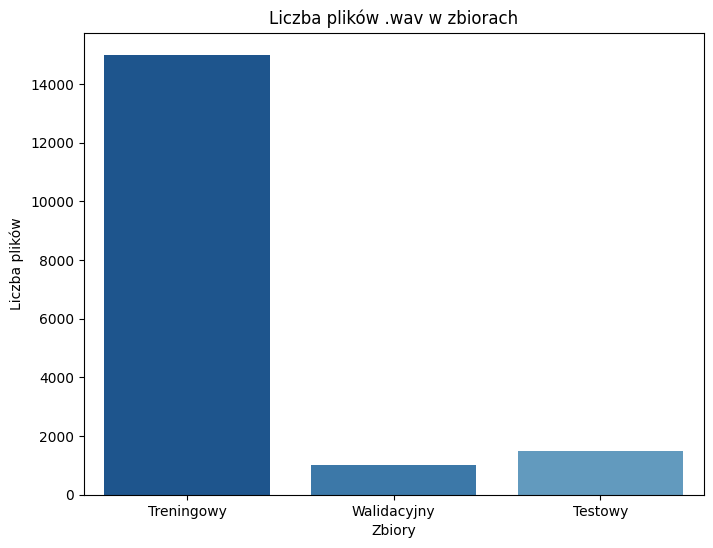

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def count_files_in_set(set_path):
    total_files = 0
    for emotion in emotions:
        emotion_path = os.path.join(set_path, emotion)
        if os.path.isdir(emotion_path):
            total_files += len([f for f in os.listdir(emotion_path) if f.endswith('.wav')])
    return total_files

train_files_count = count_files_in_set(train_set_path)
val_files_count = count_files_in_set(val_set_path)
test_files_count = count_files_in_set(test_set_path)

total_files_count = train_files_count + val_files_count + test_files_count

data = {
    'Zbiór': ['Treningowy', 'Walidacyjny', 'Testowy', 'Łącznie'],
    'Liczba plików': [train_files_count, val_files_count, test_files_count, total_files_count]
}

df = pd.DataFrame(data)
print("Tabela z liczbą plików w zbiorach:")
print(df)

labels = ['Treningowy', 'Walidacyjny', 'Testowy']
file_counts = [train_files_count, val_files_count, test_files_count]

sns.set_palette("Blues_r")

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=file_counts)
plt.xlabel('Zbiory')
plt.ylabel('Liczba plików')
plt.title('Liczba plików .wav w zbiorach')
plt.show()


<a id="2"></a>
# <p style="padding:10px;background-color:#082E79;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">TWORZENIE DATAFRAME DLA KAŻDEGO ZE ZBIORÓW </p>

In [5]:
import os
import pandas as pd

def create_database_set(set_path, emotions):
    data = {'Path': [], 'Emotions': []}
    
    for emotion in emotions:
        emotion_folder = os.path.join(set_path, emotion)
        
        if os.path.isdir(emotion_folder):
            for file in os.listdir(emotion_folder):
                if file.endswith('.wav'):
                    file_path = os.path.join(emotion_folder, file)
                    data['Path'].append(file_path)
                    data['Emotions'].append(emotion)
    
    return pd.DataFrame(data)

emotions = ['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']
training_database = create_database_set(train_set_path, emotions)
validation_database = create_database_set(val_set_path, emotions)
test_database = create_database_set(test_set_path, emotions)

In [6]:
print("Training Database Sample:")
print(training_database.head())

print("\nValidation Database Sample:")
print(validation_database.head())

print("\nTest Database Sample:")
print(test_database.head())


Training Database Sample:
                                                Path Emotions
0  /kaggle/working/training_set/Angry/0015_000679...    Angry
1  /kaggle/working/training_set/Angry/0018_000659...    Angry
2  /kaggle/working/training_set/Angry/0011_000537...    Angry
3  /kaggle/working/training_set/Angry/0016_000444...    Angry
4  /kaggle/working/training_set/Angry/0012_000433...    Angry

Validation Database Sample:
                                                Path Emotions
0  /kaggle/working/validation_set/Angry/0018_0004...    Angry
1  /kaggle/working/validation_set/Angry/0014_0003...    Angry
2  /kaggle/working/validation_set/Angry/0017_0003...    Angry
3  /kaggle/working/validation_set/Angry/0014_0006...    Angry
4  /kaggle/working/validation_set/Angry/0011_0005...    Angry

Test Database Sample:
                                             Path Emotions
0  /kaggle/working/test_set/Angry/0020_000545.wav    Angry
1  /kaggle/working/test_set/Angry/0012_000410.wav    Angry
2

<a id="4"></a>
# <p style="padding:10px;background-color:#082E79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EKSTRAKCJA CECH</p>

## WYBÓR CECH

In [7]:
import numpy as np
import librosa

def calculate_zcr(audio_data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=audio_data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def calculate_rmse(audio_data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=audio_data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def calculate_mfcc(audio_data, sample_rate, flatten=True):
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sample_rate)
    return np.ravel(mfcc.T) if flatten else mfcc.T

def calculate_spectral_bandwidth(audio_data, sample_rate, hop_length=512):
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate, hop_length=hop_length)
    return np.squeeze(spectral_bandwidth)

def calculate_pitch(audio_data, sample_rate, hop_length=512):
    pitches, _ = librosa.core.piptrack(y=audio_data, sr=sample_rate, hop_length=hop_length)
    pitch_values = np.max(pitches, axis=0)
    pitch_values = pitch_values[pitch_values > 0]  
    return pitch_values if len(pitch_values) > 0 else np.array([0])

def calculate_energy(audio_data, frame_length=2048, hop_length=512):
    energy = np.array([np.sum(np.abs(audio_data[i:i+frame_length]**2)) for i in range(0, len(audio_data), hop_length)])
    return energy

def calculate_tempo(audio_data, sample_rate):
    tempo, _ = librosa.beat.beat_track(y=audio_data, sr=sample_rate)
    return tempo

def calculate_rolloff(audio_data, sample_rate, roll_percent=0.85, hop_length=512):
    rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate, roll_percent=roll_percent, hop_length=hop_length)
    return np.squeeze(rolloff)

def extract_audio_features(data, sr=16000, frame_length=2048, hop_length=512):
    zcr = calculate_zcr(data, frame_length, hop_length)
    rmse = calculate_rmse(data, frame_length, hop_length)
    mfcc = calculate_mfcc(data, sr)
    spectral_bandwidth = calculate_spectral_bandwidth(data, sr, hop_length)
    pitch = calculate_pitch(data, sr, hop_length)
    energy = calculate_energy(data, frame_length, hop_length)
    tempo = calculate_tempo(data, sr)
    rolloff = calculate_rolloff(data, sr, hop_length=hop_length)  
    
    return np.hstack([zcr, rmse, mfcc, spectral_bandwidth, pitch, energy, tempo, rolloff])

## WYODRĘBNIENIE CECH I ZAPISANIE ICH W PLIKACH CSV

In [7]:
import numpy as np
import librosa
import timeit
from tqdm.auto import tqdm


def get_audio_features(path, duration=2.76, offset=0.4):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    features = [extract_audio_features(data, sr)]
    return np.vstack(features)

def process_dataset(database, desc):
    features_list, emotions_list = [], []
    
    for idx, (file_path, emotion) in enumerate(tqdm(zip(database.Path, database.Emotions), total=database.Path.shape[0], desc=desc)):
        audio_features = get_audio_features(file_path)
        
        if idx % 500 == 0 and idx != 0:
            print(f'Przetworzono {idx} plików audio w zbiorze {desc.lower()}.')
        
        features_list.extend(audio_features)
        emotions_list.extend([emotion] * len(audio_features))
    
    return features_list, emotions_list

In [11]:
import numpy as np

def save_and_process_data(features_list, emotions_list, filename):
    Emotions = pd.DataFrame(features_list)
    Emotions['Emotions'] = emotions_list

    Emotions.to_csv(filename, index=False)
    print(f'Plik {filename} zapisany.')

    if Emotions.isna().any().any():
        print("Brakujące wartości wykryte. Wypełnianie zerami...")
        Emotions = Emotions.fillna(0)
    else:
        print("Brak brakujących wartości.")

    print(f"Suma brakujących wartości w {filename}:")
    print(np.sum(Emotions.isna(), axis=0))
    print(f"Czy zawiera brakujące wartości: {Emotions.isna().any().any()}")
    print(f"Kształt {filename}: {Emotions.shape}\n")

    return Emotions

train_features, train_emotions = process_dataset(training_database, desc='Przetwarzanie zbioru treningowego')
train_Emotions = save_and_process_data(train_features, train_emotions, 'train_emotions.csv')

val_features, val_emotions = process_dataset(validation_database, desc='Przetwarzanie zbioru walidacyjnego')
val_Emotions = save_and_process_data(val_features, val_emotions, 'validation_emotions.csv')

test_features, test_emotions = process_dataset(test_database, desc='Przetwarzanie zbioru testowego')
test_Emotions = save_and_process_data(test_features, test_emotions, 'test_emotions.csv')


Przetwarzanie zbioru treningowego:   0%|          | 0/15000 [00:00<?, ?it/s]

Przetworzono 500 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 1000 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 1500 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 2000 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 2500 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 3000 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 3500 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 4000 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 4500 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 5000 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 5500 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 6000 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 6500 plików audio w zbiorze przetwarzanie zbioru treningowego.
Przetworzono 

Przetwarzanie zbioru walidacyjnego:   0%|          | 0/1000 [00:00<?, ?it/s]

Przetworzono 500 plików audio w zbiorze przetwarzanie zbioru walidacyjnego.
Plik validation_emotions.csv zapisany.
Brakujące wartości wykryte. Wypełnianie zerami...
Suma brakujących wartości w validation_emotions.csv:
0           0
1           0
2           0
3           0
4           0
           ..
3091        0
3092        0
3093        0
3094        0
Emotions    0
Length: 3096, dtype: int64
Czy zawiera brakujące wartości: False
Kształt validation_emotions.csv: (1000, 3096)



Przetwarzanie zbioru testowego:   0%|          | 0/1500 [00:00<?, ?it/s]

Przetworzono 500 plików audio w zbiorze przetwarzanie zbioru testowego.
Przetworzono 1000 plików audio w zbiorze przetwarzanie zbioru testowego.
Plik test_emotions.csv zapisany.
Brakujące wartości wykryte. Wypełnianie zerami...
Suma brakujących wartości w test_emotions.csv:
0           0
1           0
2           0
3           0
4           0
           ..
3091        0
3092        0
3093        0
3094        0
Emotions    0
Length: 3096, dtype: int64
Czy zawiera brakujące wartości: False
Kształt test_emotions.csv: (1500, 3096)



## PRZYGOTOWANIE DANYCH POD TRENING 

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def process_data_for_training(Emotions_df):
    X = Emotions_df.iloc[:, :-1].values
    Y = Emotions_df['Emotions'].values

    encoder = OneHotEncoder()
    Y = encoder.fit_transform(Y.reshape(-1, 1)).toarray()

    return X, Y, encoder

x_train, y_train, encoder = process_data_for_training(train_Emotions)
x_val, y_val, _ = process_data_for_training(val_Emotions)
x_test, y_test, _ = process_data_for_training(test_Emotions)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

x_traincnn = np.expand_dims(x_train, axis=2)
x_valcnn = np.expand_dims(x_val, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

np.save('x_traincnn.npy', x_traincnn)
np.save('y_train.npy', y_train)
np.save('x_valcnn.npy', x_valcnn)
np.save('y_val.npy', y_val)
np.save('x_testcnn.npy', x_testcnn)
np.save('y_test.npy', y_test)

print(f"x_train shape: {x_traincnn.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_valcnn.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_testcnn.shape}, y_test shape: {y_test.shape}")


x_train shape: (15000, 3095, 1), y_train shape: (15000, 5)
x_val shape: (1000, 3095, 1), y_val shape: (1000, 5)
x_test shape: (1500, 3095, 1), y_test shape: (1500, 5)


<a id="4"></a>
# <p style="padding:10px;background-color:#082E79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">MODEL CNN</p>

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, BatchNormalization, GRU
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical


In [17]:
import tensorflow as tf
from tensorflow.keras import layers as L

model = tf.keras.Sequential([
    L.Input(shape=(x_traincnn.shape[1], 1)),  
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),

    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Dropout(0.2),  

    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),

    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Dropout(0.2), 

    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    L.Dropout(0.2),  

    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    L.Dense(5, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 3095, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3095, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1548, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 1548, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1548, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 774, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 774, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 774, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 774, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 387, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 387, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 387, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 194, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 194, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 194, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 194, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 97, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 97, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12416)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,357,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,56

 Total params: 8,633,989 (32.94 MB)

 Trainable params: 8,629,637 (32.92 MB)

 Non-trainable params: 4,352 (17.00 KB)

<a id="4"></a>
# <p style="padding:10px;background-color:#082E79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">TRENING</p>

## PIERWSZE 10 EPOK 

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(
    x_traincnn,
    y_train,
    epochs=10,
    validation_data=(x_valcnn, y_val),  
    batch_size=64,
    callbacks=[early_stop, lr_reduction, model_checkpoint]
)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3173s 13s/step - accuracy: 0.3505 - loss: 1.7191 - val_accuracy: 0.2000 - val_loss: 7.6581 - learning_rate: 0.0010
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3160s 13s/step - accuracy: 0.5155 - loss: 1.1467 - val_accuracy: 0.2000 - val_loss: 4.7617 - learning_rate: 0.0010
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3077s 13s/step - accuracy: 0.5916 - loss: 1.0062 - val_accuracy: 0.2690 - val_loss: 2.4345 - learning_rate: 0.0010
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3112s 13s/step - accuracy: 0.6245 - loss: 0.9351 - val_accuracy: 0.4550 - val_loss: 1.4391 - learning_rate: 0.0010
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3120s 13s/step - accuracy: 0.6771 - loss: 0.8155 - val_accuracy: 0.4130 - val_loss: 2.0071 - learning_rate: 0.0010
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3155s 13s/step - accuracy: 0.6934 - loss: 0.7704 - val_accuracy: 0.3460 - val_loss: 2.4598 - learning_rate: 0.0010
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3156s 13s/step - accuracy: 0.7

## OBSERWACJA POSTĘPÓW WRAZ Z KOLEJNYMI EPOKAMI 

Accuracy of our model on test data: 62.66666650772095 %


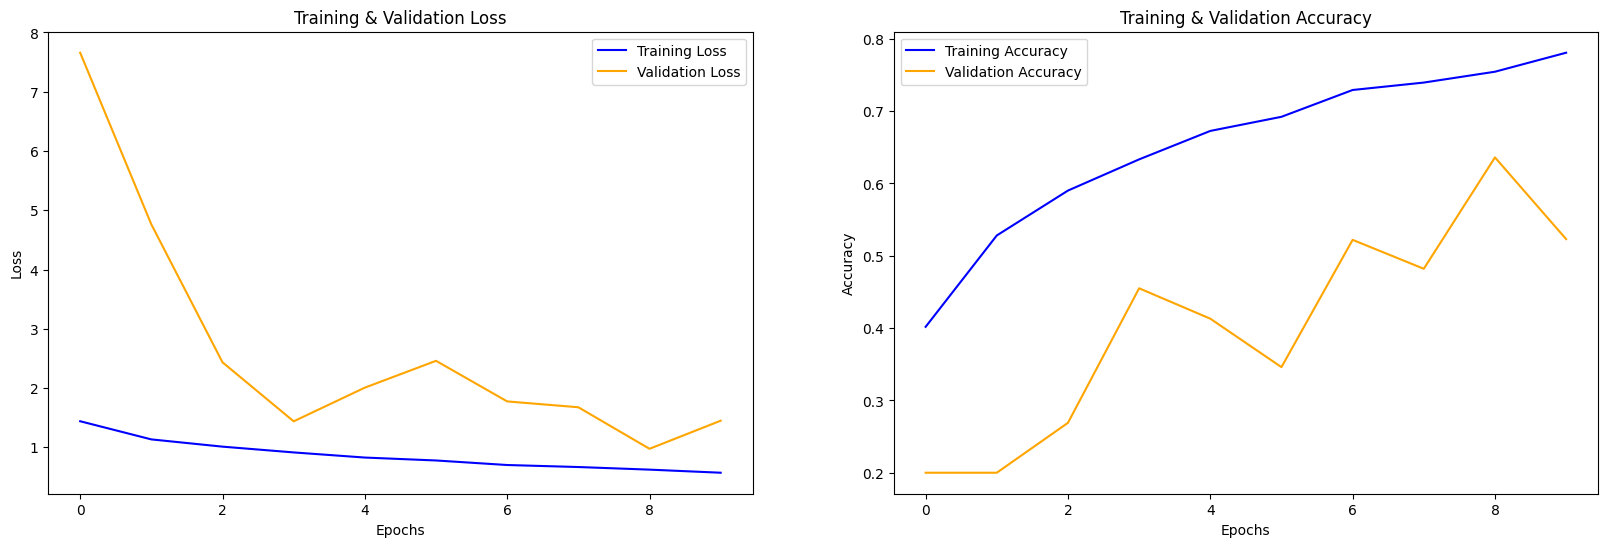

In [19]:
import matplotlib.pyplot as plt

test_accuracy = model.evaluate(x_testcnn, y_test, verbose=0)[1] * 100
print("Accuracy of our model on test data:", test_accuracy, "%")

epochs = list(range(len(history.history['loss'])))

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(epochs, train_loss, label='Training Loss', color='blue')
ax[0].plot(epochs, val_loss, label='Validation Loss', color='orange')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs, train_acc, label='Training Accuracy', color='blue')
ax[1].plot(epochs, val_acc, label='Validation Accuracy', color='orange')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.show()


## OBSERWACJA WYNIKÓW TRENIGU 

47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step


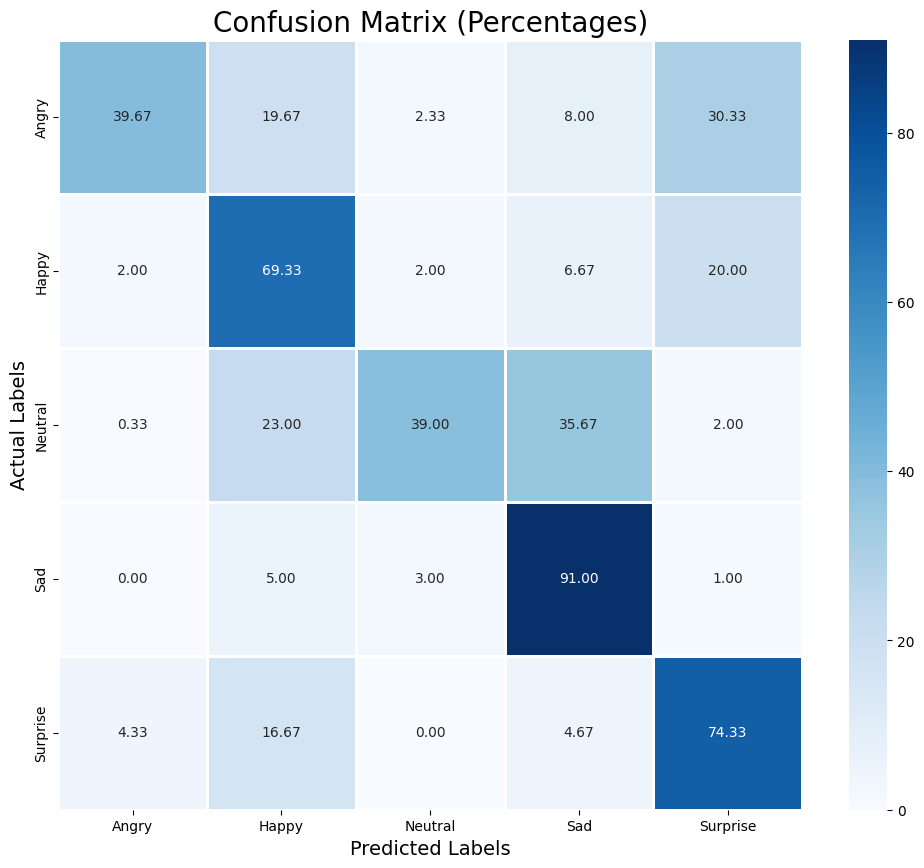

              precision    recall  f1-score   support

       Angry       0.86      0.40      0.54       300
       Happy       0.52      0.69      0.59       300
     Neutral       0.84      0.39      0.53       300
         Sad       0.62      0.91      0.74       300
    Surprise       0.58      0.74      0.65       300

    accuracy                           0.63      1500
   macro avg       0.68      0.63      0.61      1500
weighted avg       0.68      0.63      0.61      1500

Test accuracy: 0.6267
Test loss: 1.0647


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class_labels = encoder.categories_[0]  

y_pred = model.predict(x_testcnn)

predicted_class_indices = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, predicted_class_indices)

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(12, 10))
cm_df = pd.DataFrame(cm_percent, index=class_labels, columns=class_labels)
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Blues', linewidths=1, linecolor='white')
plt.title('Confusion Matrix (Percentages)', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

report = classification_report(y_true, predicted_class_indices, target_names=class_labels)
print(report)

test_loss, test_accuracy = model.evaluate(x_testcnn, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


## ZAPISANIE KODERA I ENKODERA

In [21]:
import pickle

with open('scaler2_62.pickle', 'wb') as f:
    pickle.dump(scaler, f)

with open('encoder2_62.pickle', 'wb') as f:
    pickle.dump(encoder, f)

with open('scaler2_62.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('encoder2_62.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

print("Done")


Done


## TRENING DO 20 EPOK 

In [8]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

model_path = '/kaggle/input/model_62_procent/tensorflow2/default/1/best_model1_weights_62.keras'
model = load_model(model_path)

x_traincnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_traincnn_62.npy')
y_train = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_train_62.npy')
x_valcnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_valcnn_62.npy')
y_val = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_val_62.npy')
x_testcnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_testcnn_62.npy')
y_test = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_test_62.npy')


In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(
    x_traincnn,
    y_train,
    epochs=20,  
    initial_epoch=10, 
    validation_data=(x_valcnn, y_val),
    batch_size=64,
    callbacks=[early_stop, lr_reduction, model_checkpoint]
)


Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3064s 13s/step - accuracy: 0.7740 - loss: 0.5867 - val_accuracy: 0.4940 - val_loss: 2.4070 - learning_rate: 0.0010
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3070s 13s/step - accuracy: 0.8006 - loss: 0.5121 - val_accuracy: 0.5740 - val_loss: 1.3532 - learning_rate: 0.0010
Epoch 13/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3095s 13s/step - accuracy: 0.8116 - loss: 0.4887 - val_accuracy: 0.6360 - val_loss: 1.1236 - learning_rate: 0.0010
Epoch 14/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3050s 13s/step - accuracy: 0.8263 - loss: 0.4464 - val_accuracy: 0.6830 - val_loss: 0.8963 - learning_rate: 0.0010
Epoch 15/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2960s 13s/step - accuracy: 0.8586 - loss: 0.3844 - val_accuracy: 0.6890 - val_loss: 1.0425 - learning_rate: 0.0010
Epoch 16/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2972s 13s/step - accuracy: 0.8630 - loss: 0.3566 - val_accuracy: 0.5770 - val_loss: 2.1299 - learning_rate: 0.0010
Epoch 17/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3001s 13s/step - accura

## TRENING DO 30 EPOK 

In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


model_path = '/kaggle/input/model_777/tensorflow2/default/1/best_model1_weights_777.keras'

model = load_model(model_path)

x_traincnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_traincnn_62.npy')
y_train = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_train_62.npy')
x_valcnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_valcnn_62.npy')
y_val = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_val_62.npy')
x_testcnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_testcnn_62.npy')
y_test = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_test_62.npy')


In [2]:
import pickle 

with open('/kaggle/input/model_777/tensorflow2/default/1/scaler2_777.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('//kaggle/input/model_777/tensorflow2/default/1/encoder2_777.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(
    x_traincnn,
    y_train,
    epochs=30,
    initial_epoch=20, 
    validation_data=(x_valcnn, y_val),
    batch_size=64,
    callbacks=[early_stop, lr_reduction, model_checkpoint]
)


Epoch 21/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2817s 12s/step - accuracy: 0.9440 - loss: 0.1683 - val_accuracy: 0.7030 - val_loss: 1.0599 - learning_rate: 5.0000e-04
Epoch 22/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2822s 12s/step - accuracy: 0.9437 - loss: 0.1619 - val_accuracy: 0.6460 - val_loss: 1.3640 - learning_rate: 5.0000e-04
Epoch 23/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2848s 12s/step - accuracy: 0.9530 - loss: 0.1436 - val_accuracy: 0.7260 - val_loss: 0.9333 - learning_rate: 5.0000e-04
Epoch 24/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2812s 12s/step - accuracy: 0.9588 - loss: 0.1199 - val_accuracy: 0.6560 - val_loss: 1.2825 - learning_rate: 5.0000e-04
Epoch 25/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2846s 12s/step - accuracy: 0.9624 - loss: 0.1075 - val_accuracy: 0.6800 - val_loss: 1.2367 - learning_rate: 5.0000e-04
Epoch 26/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2846s 12s/step - accuracy: 0.9630 - loss: 0.1056 - val_accuracy: 0.7320 - val_loss: 0.9380 - learning_rate: 5.0000e-04
Epoch 27/30
235/235 ━━━━━━━━━━━━━━━━━━━━

In [3]:
test_loss, test_accuracy = model.evaluate(x_testcnn, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.7773
Test loss: 0.9431


47/47 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step


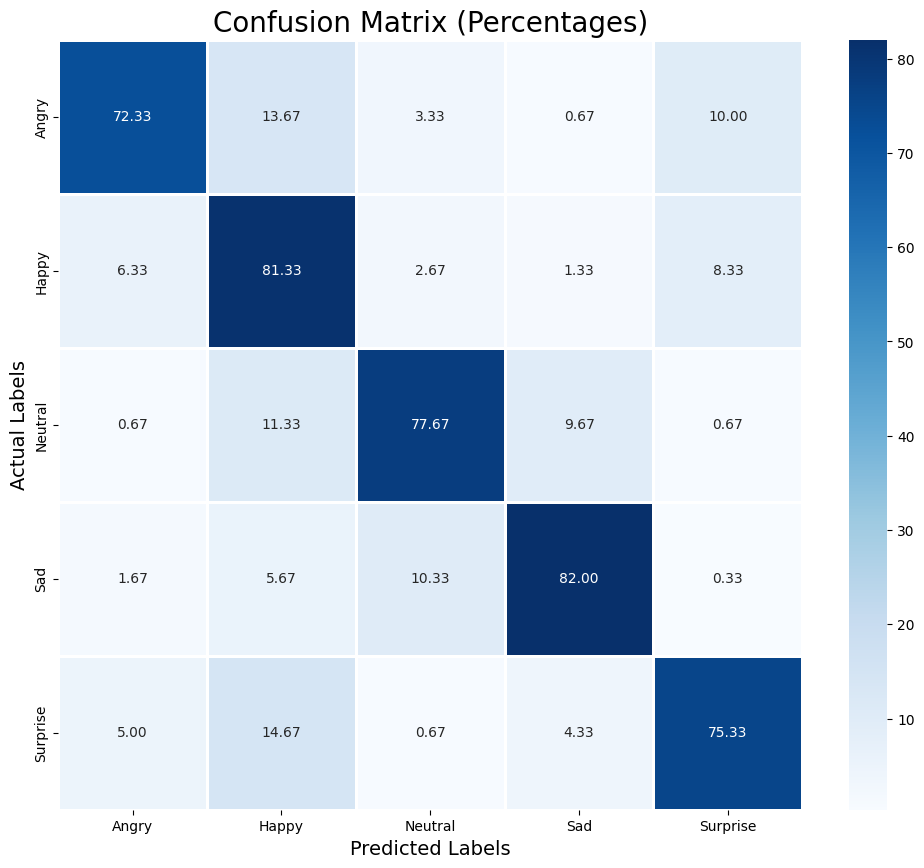

              precision    recall  f1-score   support

       Angry       0.84      0.72      0.78       300
       Happy       0.64      0.81      0.72       300
     Neutral       0.82      0.78      0.80       300
         Sad       0.84      0.82      0.83       300
    Surprise       0.80      0.75      0.77       300

    accuracy                           0.78      1500
   macro avg       0.79      0.78      0.78      1500
weighted avg       0.79      0.78      0.78      1500

Test accuracy: 0.7773
Test loss: 0.9431


In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class_labels = encoder2.categories_[0] 

y_pred = model.predict(x_testcnn)

predicted_class_indices = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, predicted_class_indices)

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(12, 10))
cm_df = pd.DataFrame(cm_percent, index=class_labels, columns=class_labels)
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Blues', linewidths=1, linecolor='white')
plt.title('Confusion Matrix (Percentages)', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

report = classification_report(y_true, predicted_class_indices, target_names=class_labels)
print(report)

test_loss, test_accuracy = model.evaluate(x_testcnn, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


## TRENING DO 42 EPOK 

In [2]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

model_path = '/kaggle/input/model_777/tensorflow2/default/1/best_model1_weights_777.keras'

model = load_model(model_path)

x_traincnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_traincnn_62.npy')
y_train = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_train_62.npy')
x_valcnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_valcnn_62.npy')
y_val = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_val_62.npy')
x_testcnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_testcnn_62.npy')
y_test = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_test_62.npy')


In [3]:
import pickle 
with open('/kaggle/input/model_777/tensorflow2/default/1/scaler2_777.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('//kaggle/input/model_777/tensorflow2/default/1/encoder2_777.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(
    x_traincnn,
    y_train,
    epochs=42,  
    initial_epoch=30,  
    validation_data=(x_valcnn, y_val),
    batch_size=64,
    callbacks=[early_stop, lr_reduction, model_checkpoint]
)


Epoch 31/42
235/235 ━━━━━━━━━━━━━━━━━━━━ 3021s 13s/step - accuracy: 0.9796 - loss: 0.0653 - val_accuracy: 0.7440 - val_loss: 1.0749 - learning_rate: 5.0000e-04
Epoch 32/42
235/235 ━━━━━━━━━━━━━━━━━━━━ 2987s 13s/step - accuracy: 0.9734 - loss: 0.0745 - val_accuracy: 0.6620 - val_loss: 1.4253 - learning_rate: 5.0000e-04
Epoch 33/42
235/235 ━━━━━━━━━━━━━━━━━━━━ 2986s 13s/step - accuracy: 0.9834 - loss: 0.0528 - val_accuracy: 0.7240 - val_loss: 1.1522 - learning_rate: 5.0000e-04
Epoch 34/42
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9771 - loss: 0.0667 
Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
235/235 ━━━━━━━━━━━━━━━━━━━━ 3018s 13s/step - accuracy: 0.9771 - loss: 0.0667 - val_accuracy: 0.7380 - val_loss: 1.1795 - learning_rate: 5.0000e-04
Epoch 35/42
235/235 ━━━━━━━━━━━━━━━━━━━━ 3021s 13s/step - accuracy: 0.9859 - loss: 0.0409 - val_accuracy: 0.7790 - val_loss: 0.8410 - learning_rate: 2.5000e-04
Epoch 36/42
235/235 ━━━━━━━━━━━━━━━━━━━━ 3008s 

In [5]:
import pickle

with open('scaler2_xx.pickle', 'wb') as f:
    pickle.dump(scaler2, f)

with open('encoder2_xx.pickle', 'wb') as f:
    pickle.dump(encoder2, f)

with open('scaler2_xx.pickle', 'rb') as f:
    scaler4 = pickle.load(f)

with open('encoder2_xx.pickle', 'rb') as f:
    encoder4 = pickle.load(f)

print("Done")


Done


47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step


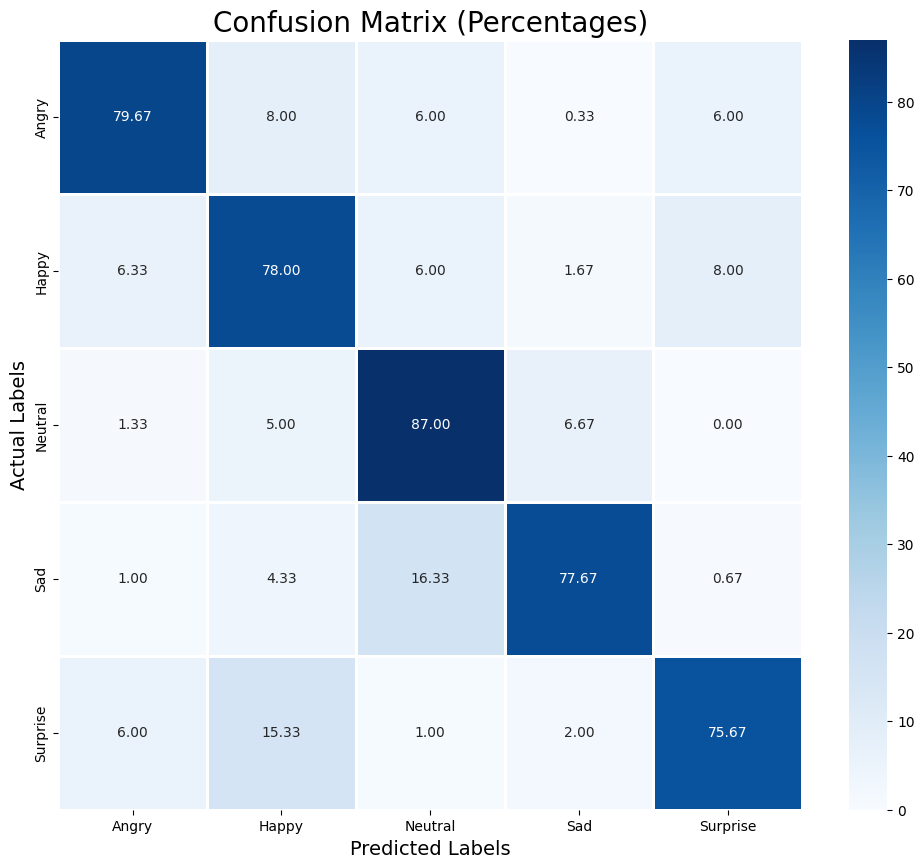

              precision    recall  f1-score   support

       Angry       0.84      0.80      0.82       300
       Happy       0.70      0.78      0.74       300
     Neutral       0.75      0.87      0.80       300
         Sad       0.88      0.78      0.82       300
    Surprise       0.84      0.76      0.80       300

    accuracy                           0.80      1500
   macro avg       0.80      0.80      0.80      1500
weighted avg       0.80      0.80      0.80      1500

Test accuracy: 0.7960
Test loss: 0.9449


In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class_labels = encoder2.categories_[0]  

y_pred = model.predict(x_testcnn)

predicted_class_indices = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, predicted_class_indices)

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(12, 10))
cm_df = pd.DataFrame(cm_percent, index=class_labels, columns=class_labels)
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Blues', linewidths=1, linecolor='white')
plt.title('Confusion Matrix (Percentages)', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

report = classification_report(y_true, predicted_class_indices, target_names=class_labels)
print(report)

test_loss, test_accuracy = model.evaluate(x_testcnn, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


## TRENING DO 50 EPOK 

In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

model_path = '/kaggle/input/model80/tensorflow2/default/1/best_model1_weights80.keras'

model = load_model(model_path)

x_traincnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_traincnn_62.npy')
y_train = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_train_62.npy')
x_valcnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_valcnn_62.npy')
y_val = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_val_62.npy')
x_testcnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_testcnn_62.npy')
y_test = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_test_62.npy')

In [2]:
import pickle 
with open('/kaggle/input/model80/tensorflow2/default/1/scaler2_80.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('/kaggle/input/model80/tensorflow2/default/1/encoder2_80.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(
    x_traincnn,
    y_train,
    epochs=50,
    initial_epoch=42, 
    validation_data=(x_valcnn, y_val),
    batch_size=64,
    callbacks=[early_stop, lr_reduction, model_checkpoint]
)


Epoch 43/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2907s 12s/step - accuracy: 0.9970 - loss: 0.0129 - val_accuracy: 0.7650 - val_loss: 1.0456 - learning_rate: 2.5000e-04
Epoch 44/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2905s 12s/step - accuracy: 0.9931 - loss: 0.0226 - val_accuracy: 0.7870 - val_loss: 0.9058 - learning_rate: 2.5000e-04
Epoch 45/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2905s 12s/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 0.7320 - val_loss: 1.3659 - learning_rate: 2.5000e-04
Epoch 46/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2909s 12s/step - accuracy: 0.9966 - loss: 0.0157 - val_accuracy: 0.7290 - val_loss: 1.2495 - learning_rate: 2.5000e-04
Epoch 47/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9969 - loss: 0.0130 
Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
235/235 ━━━━━━━━━━━━━━━━━━━━ 2911s 12s/step - accuracy: 0.9969 - loss: 0.0130 - val_accuracy: 0.7600 - val_loss: 1.2679 - learning_rate: 2.5000e-04
Epoch 48/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2957s 

## TRENING DO 55 EPOK 

In [4]:
model_path = '/kaggle/working/best_model1_weights.keras'
history = model.fit(
    x_traincnn,
    y_train,
    epochs=55,  
    initial_epoch=49, 
    validation_data=(x_valcnn, y_val),
    batch_size=64,
    callbacks=[early_stop, lr_reduction, model_checkpoint]
)

Epoch 50/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 2949s 13s/step - accuracy: 0.9974 - loss: 0.0122 - val_accuracy: 0.7990 - val_loss: 0.8696 - learning_rate: 1.2500e-04
Epoch 51/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 2956s 13s/step - accuracy: 0.9985 - loss: 0.0088 - val_accuracy: 0.8020 - val_loss: 0.8605 - learning_rate: 1.2500e-04
Epoch 52/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 3003s 13s/step - accuracy: 0.9977 - loss: 0.0093 - val_accuracy: 0.7880 - val_loss: 0.8886 - learning_rate: 1.2500e-04
Epoch 53/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 2968s 13s/step - accuracy: 0.9988 - loss: 0.0075 - val_accuracy: 0.7840 - val_loss: 0.9553 - learning_rate: 1.2500e-04
Epoch 54/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9986 - loss: 0.0087 
Epoch 54: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
235/235 ━━━━━━━━━━━━━━━━━━━━ 2971s 13s/step - accuracy: 0.9986 - loss: 0.0087 - val_accuracy: 0.7790 - val_loss: 1.0024 - learning_rate: 1.2500e-04
Epoch 55/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 2972s 1

47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step


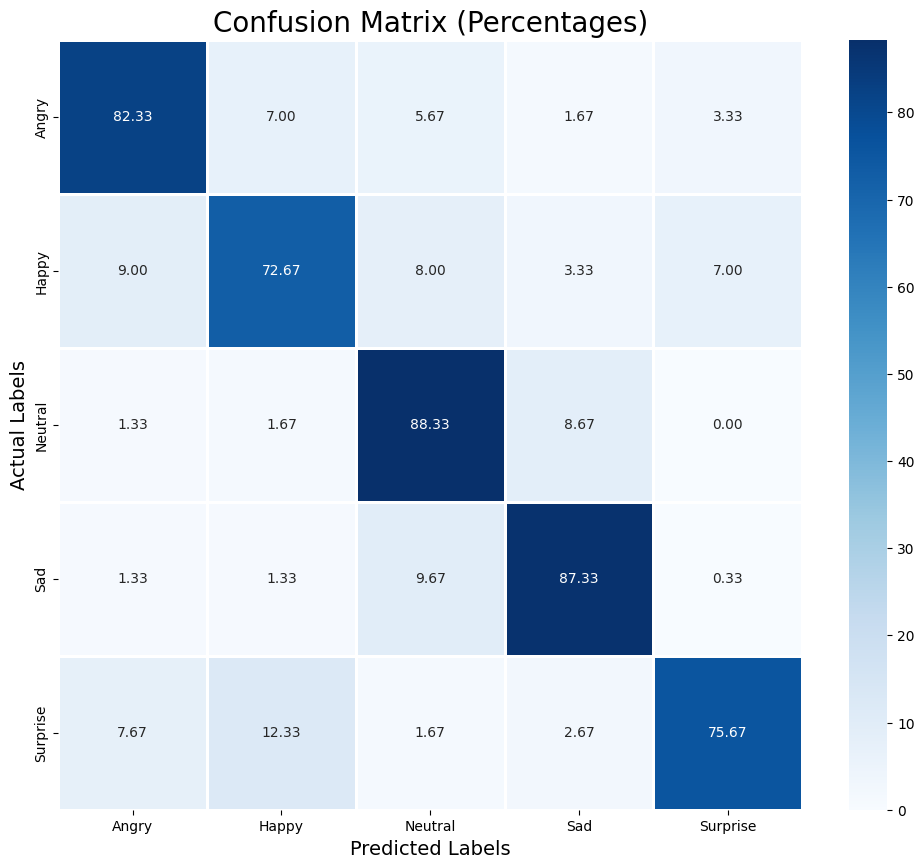

              precision    recall  f1-score   support

       Angry       0.81      0.82      0.82       300
       Happy       0.76      0.73      0.75       300
     Neutral       0.78      0.88      0.83       300
         Sad       0.84      0.87      0.86       300
    Surprise       0.88      0.76      0.81       300

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500

Test accuracy: 0.8127
Test loss: 0.9271


In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class_labels = encoder2.categories_[0]  

y_pred = model.predict(x_testcnn)

predicted_class_indices = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, predicted_class_indices)

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(12, 10))
cm_df = pd.DataFrame(cm_percent, index=class_labels, columns=class_labels)
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Blues', linewidths=1, linecolor='white')
plt.title('Confusion Matrix (Percentages)', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

report = classification_report(y_true, predicted_class_indices, target_names=class_labels)
print(report)

test_loss, test_accuracy = model.evaluate(x_testcnn, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


<a id="4"></a>
# <p style="padding:10px;background-color:#082E79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">OSTATECZNE WYNIKI PO 55 EPOKACH</p>

## WYKRESY DOKŁADNOŚCI I STRAT NA ZBIORACH: TRENINGOWYM I WALIDACYJNYM

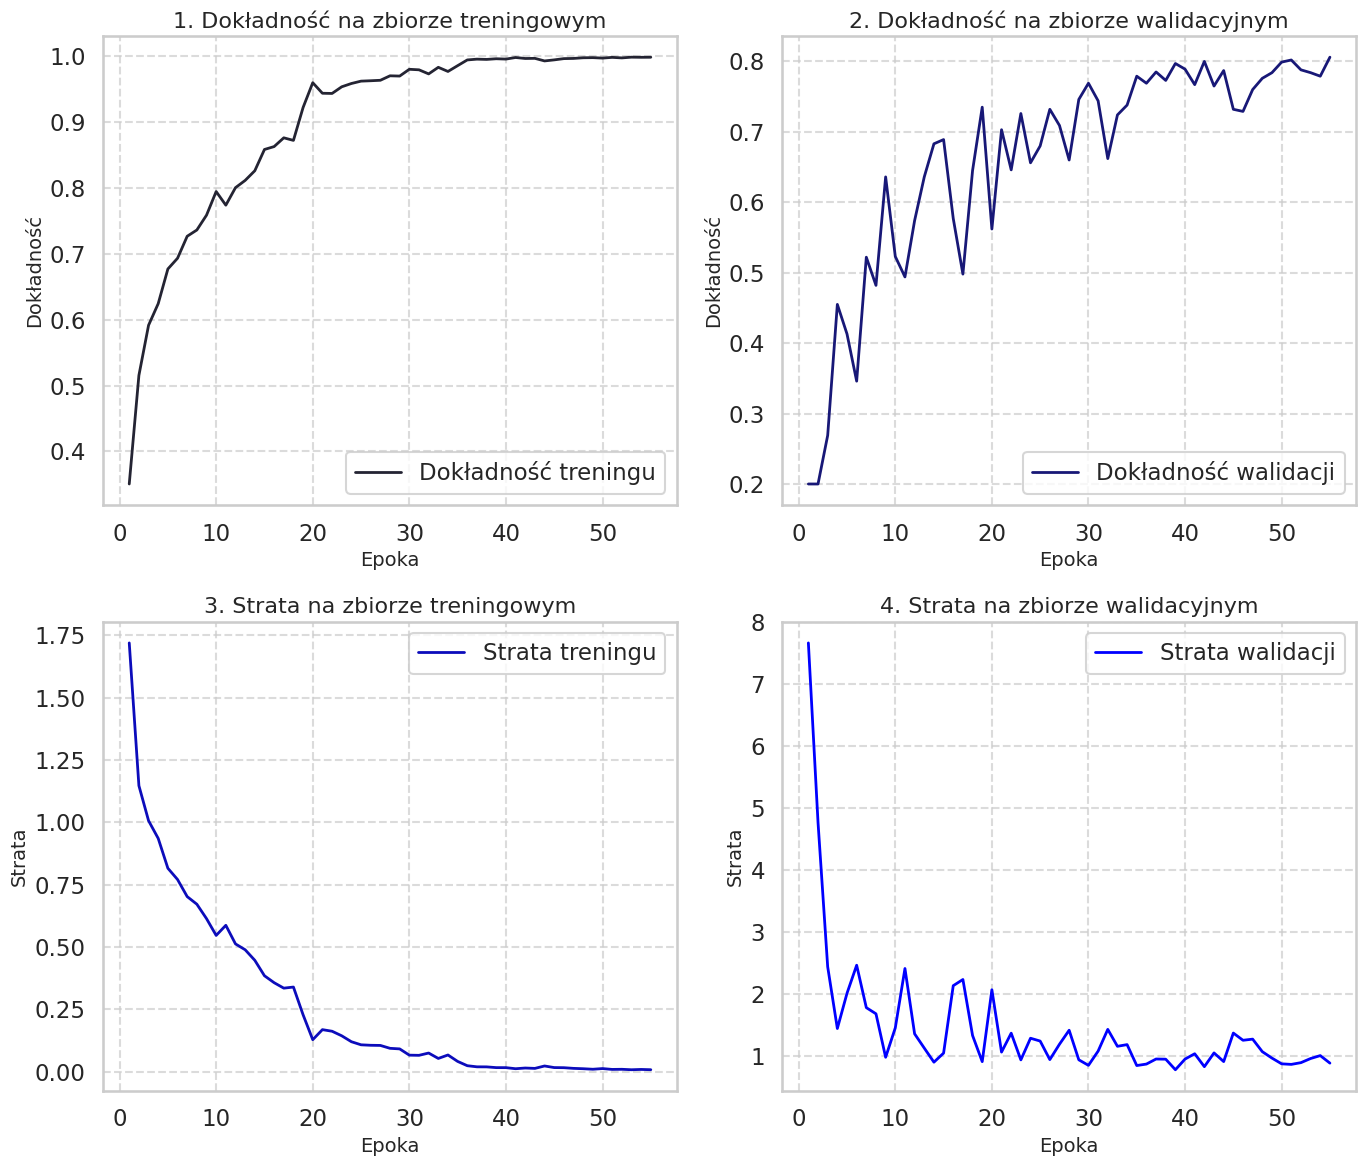

Plot saved as: /kaggle/working/epoch_results_4_plots_acc_loss.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/kaggle/input/wykresy_trenigowy_walidacyjny/other/default/1/epoch_results_4.csv"
df = pd.read_csv(file_path)

sns.set_theme(style="whitegrid", context="talk")

colors = sns.color_palette("dark:blue", 4)

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.plot(df["Epoka"], df["Dokładność"], label="Dokładność treningu", color=colors[0], linewidth=2)
plt.title("1. Dokładność na zbiorze treningowym", fontsize=16)
plt.xlabel("Epoka", fontsize=14)
plt.ylabel("Dokładność", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df["Epoka"], df["Dokładność walidacji"], label="Dokładność walidacji", color=colors[1], linewidth=2)
plt.title("2. Dokładność na zbiorze walidacyjnym", fontsize=16)
plt.xlabel("Epoka", fontsize=14)
plt.ylabel("Dokładność", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df["Epoka"], df["Strata"], label="Strata treningu", color=colors[2], linewidth=2)
plt.title("3. Strata na zbiorze treningowym", fontsize=16)
plt.xlabel("Epoka", fontsize=14)
plt.ylabel("Strata", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df["Epoka"], df["Strata walidacji"], label="Strata walidacji", color=colors[3], linewidth=2)
plt.title("4. Strata na zbiorze walidacyjnym", fontsize=16)
plt.xlabel("Epoka", fontsize=14)
plt.ylabel("Strata", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()

output_path = "/kaggle/working/epoch_results_4_plots_acc_loss.png"
plt.savefig(output_path, format='png', dpi=300)

plt.show()

print(f"Plot saved as: {output_path}")


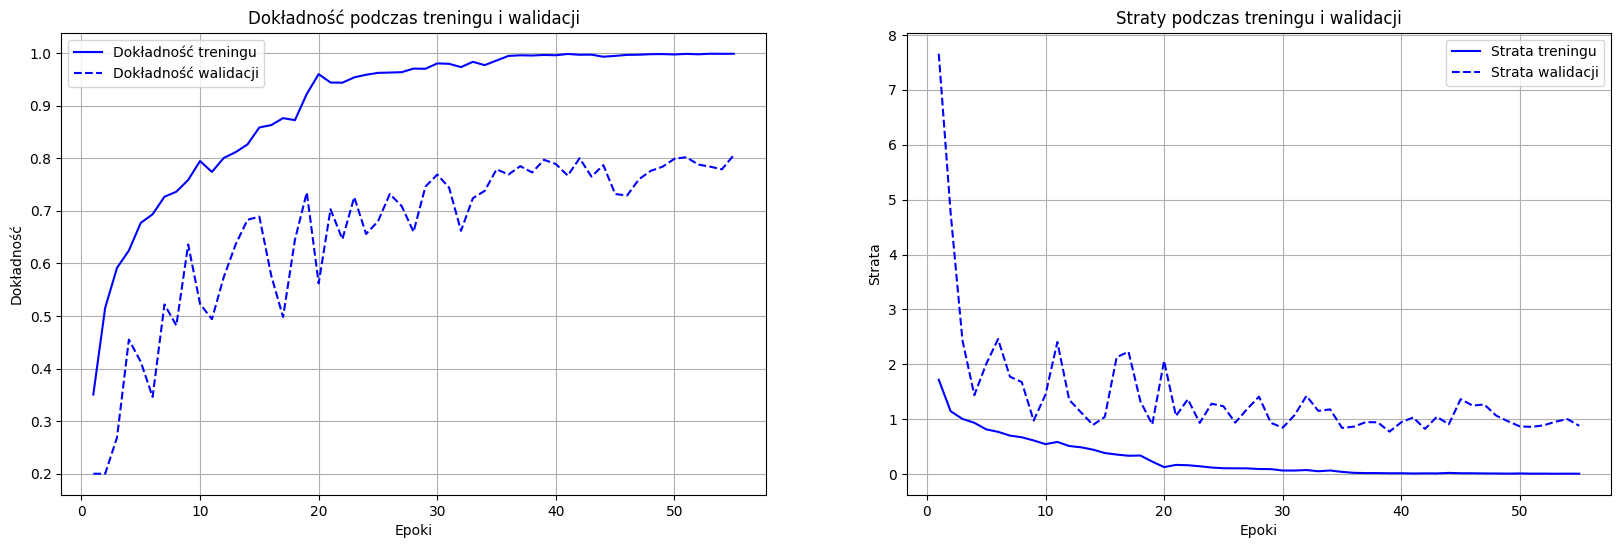

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/kaggle/input/dane_do_wykresy_epok/other/default/1/epoch_results.csv'

output_plot = '/kaggle/working/training_validation_analysis.png'

data = pd.read_csv(file_path)

epoki = data['Epoka']
strata_trening = data['Strata']
strata_walidacja = data['Strata walidacji']
dokladnosc_trening = data['Dokładność']
dokladnosc_walidacja = data['Dokładność walidacji']

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(epoki, dokladnosc_trening, label='Dokładność treningu', color='blue', linestyle='solid')
ax[0].plot(epoki, dokladnosc_walidacja, label='Dokładność walidacji', color='blue', linestyle='dashed')
ax[0].set_title('Dokładność podczas treningu i walidacji')
ax[0].set_xlabel('Epoki')
ax[0].set_ylabel('Dokładność')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(epoki, strata_trening, label='Strata treningu', color='blue', linestyle='solid')
ax[1].plot(epoki, strata_walidacja, label='Strata walidacji', color='blue', linestyle='dashed')
ax[1].set_title('Straty podczas treningu i walidacji')
ax[1].set_xlabel('Epoki')
ax[1].set_ylabel('Strata')
ax[1].legend()
ax[1].grid(True)

plt.savefig(output_plot)

plt.show()


## MACIERZ POMYŁEK DLA 55 EPOK

In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

model_path = '/kaggle/input/model_55_epok/tensorflow2/default/1/best_model1_weights_55epok.keras'

model = load_model(model_path)

x_traincnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_traincnn_62.npy')
y_train = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_train_62.npy')
x_valcnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_valcnn_62.npy')
y_val = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_val_62.npy')
x_testcnn = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/x_testcnn_62.npy')
y_test = np.load('/kaggle/input/model_62_procent/tensorflow2/default/1/y_test_62.npy')

In [14]:
import pickle 

with open('/kaggle/input/model_55_epok/tensorflow2/default/1/scaler2_55epok.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('/kaggle/input/model_55_epok/tensorflow2/default/1/encoder2_55epok.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

47/47 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step


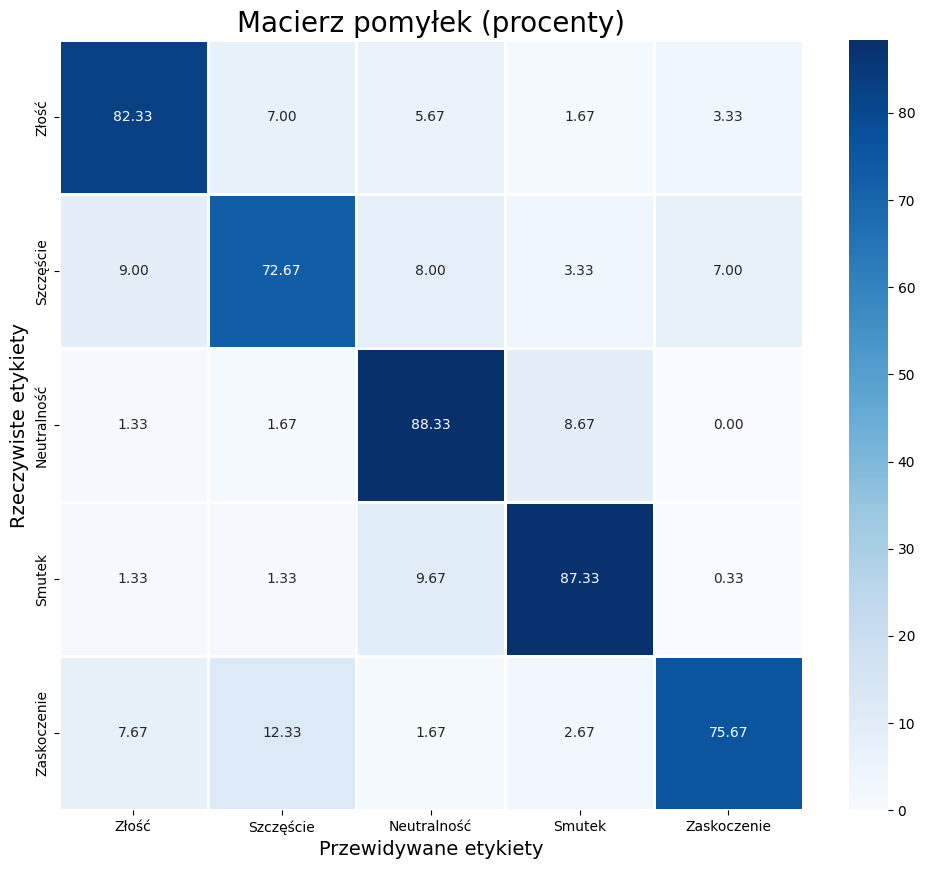

Raport klasyfikacji:
              precision    recall  f1-score   support

       Złość       0.81      0.82      0.82       300
   Szczęście       0.76      0.73      0.75       300
 Neutralność       0.78      0.88      0.83       300
      Smutek       0.84      0.87      0.86       300
 Zaskoczenie       0.88      0.76      0.81       300

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500

Dokładność na zbiorze testowym: 0.8127
Strata na zbiorze testowym: 0.9271


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class_labels = encoder2.categories_[0]  


label_mapping = {
    "Angry": "Złość",
    "Happy": "Szczęście",
    "Neutral": "Neutralność",
    "Sad": "Smutek",
    "Surprise": "Zaskoczenie"
}

polish_labels = [label_mapping[label] for label in class_labels]

y_pred = model.predict(x_testcnn)

predicted_class_indices = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, predicted_class_indices)

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(12, 10))
cm_df = pd.DataFrame(cm_percent, index=polish_labels, columns=polish_labels)
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Blues', linewidths=1, linecolor='white')
plt.title('Macierz pomyłek (procenty)', size=20)
plt.xlabel('Przewidywane etykiety', size=14)
plt.ylabel('Rzeczywiste etykiety', size=14)

output_path = "confusion_matrix.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

report = classification_report(
    y_true, predicted_class_indices, target_names=polish_labels, digits=2
)
print("Raport klasyfikacji:")
print(report)

test_loss, test_accuracy = model.evaluate(x_testcnn, y_test, verbose=0)
print(f"Dokładność na zbiorze testowym: {test_accuracy:.4f}")
print(f"Strata na zbiorze testowym: {test_loss:.4f}")


## ZAPISANIE MODELU DO APLIAKCJI 

In [2]:
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model_55epoch.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("CNN_model_weights_55epoch.weights.h5")
print("Saved model to disk")

Saved model to disk


<a id="4"></a>
# <p style="padding:10px;background-color:#082E79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">MACIERZ POMYŁEK BAZY DANYCH STWORZONEJ NA POTRZEBY PRACY</p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━

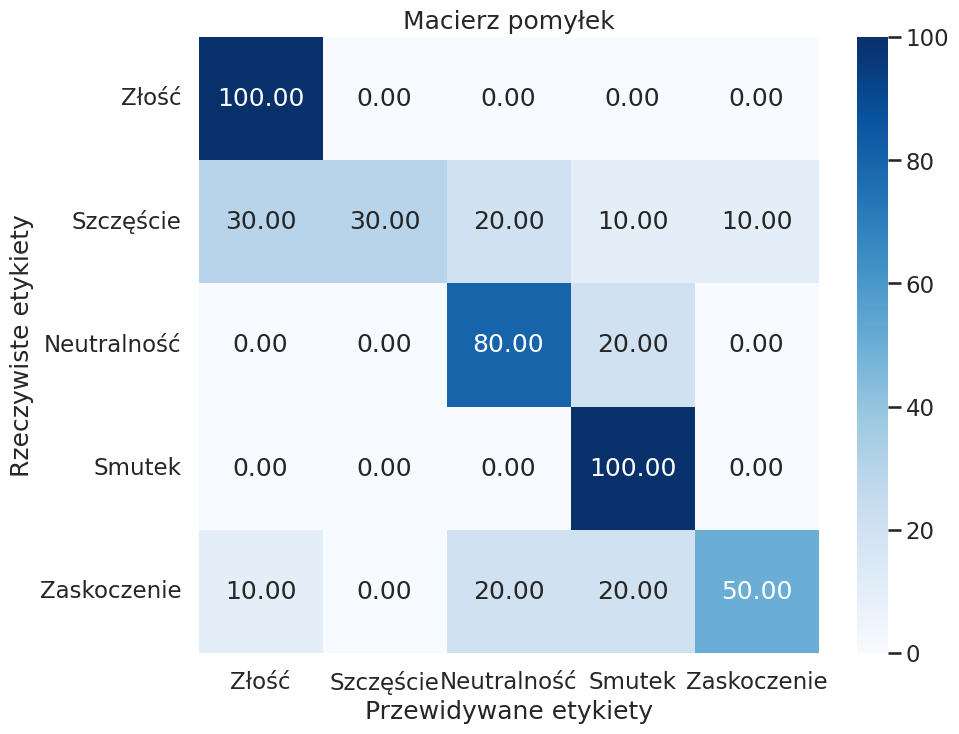

Macierz pomyłek zapisana jako obrazek: confusion_matrix.png


In [3]:
import os
import numpy as np
import librosa
import pickle
import pandas as pd
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

emotion_map = {
    "Angry": "Złość",
    "Happy": "Szczęście",
    "Neutral": "Neutralność",
    "Sad": "Smutek",
    "Surprise": "Zaskoczenie"
}

DATASET_PATH = '/kaggle/input/50plikow2/Moja_baza2'
MODEL_PATH = '/kaggle/input/model_z_apki_55_epok/other/default/1/'

try:
    with open(os.path.join(MODEL_PATH, 'CNN_model_55epoch.json'), 'r') as json_file:
        loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

    loaded_model.load_weights(os.path.join(MODEL_PATH, 'CNN_model_weights_55epoch.weights.h5'))

    with open(os.path.join(MODEL_PATH, 'encoder2_55epok.pickle'), 'rb') as f:
        encoder2 = pickle.load(f)
    
    with open(os.path.join(MODEL_PATH, 'scaler2_55epok.pickle'), 'rb') as f:
        scaler2 = pickle.load(f)

    load_status = "All files loaded successfully."
except Exception as e:
    load_status = f"Error: {str(e)}."

def convert_to_wav(input_path, output_path):
    audio = AudioSegment.from_file(input_path)
    audio.export(output_path, format="wav")

def calculate_zcr(audio_data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=audio_data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def calculate_rmse(audio_data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=audio_data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def calculate_mfcc(audio_data, sample_rate, flatten=True):
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sample_rate)
    return np.ravel(mfcc.T) if flatten else mfcc.T

def calculate_spectral_bandwidth(audio_data, sample_rate, hop_length=512):
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate, hop_length=hop_length)
    return np.squeeze(spectral_bandwidth)

def calculate_pitch(audio_data, sample_rate, hop_length=512):
    pitches, _ = librosa.core.piptrack(y=audio_data, sr=sample_rate, hop_length=hop_length)
    pitch_values = np.max(pitches, axis=0)
    pitch_values = pitch_values[pitch_values > 0]  
    return pitch_values if len(pitch_values) > 0 else np.array([0])

def calculate_energy(audio_data, frame_length=2048, hop_length=512):
    energy = np.array([np.sum(np.abs(audio_data[i:i+frame_length]**2)) for i in range(0, len(audio_data), hop_length)])
    return energy

def calculate_tempo(audio_data, sample_rate):
    tempo, _ = librosa.beat.beat_track(y=audio_data, sr=sample_rate)
    return tempo

def calculate_rolloff(audio_data, sample_rate, roll_percent=0.85, hop_length=512):
    rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate, roll_percent=roll_percent, hop_length=hop_length)
    return np.squeeze(rolloff)

def extract_audio_features(data, sr=16000, frame_length=2048, hop_length=512):
    zcr = calculate_zcr(data, frame_length, hop_length)
    rmse = calculate_rmse(data, frame_length, hop_length)
    mfcc = calculate_mfcc(data, sr)
    spectral_bandwidth = calculate_spectral_bandwidth(data, sr, hop_length)
    pitch = calculate_pitch(data, sr, hop_length)
    energy = calculate_energy(data, frame_length, hop_length)
    tempo = calculate_tempo(data, sr)
    rolloff = calculate_rolloff(data, sr, hop_length=hop_length)  

    return np.hstack([zcr, rmse, mfcc, spectral_bandwidth, pitch, energy, tempo, rolloff])


def get_predict_feat(path):
    d, s_rate = librosa.load(path, duration=2.76, offset=0.4)
    res = extract_audio_features(d)
    result = np.array(res)
    
    if result.size < 3095:
        result = np.pad(result, (0, 3095 - result.size), mode='constant')
    
    result = np.reshape(result, newshape=(1, 3095))
    result = scaler2.transform(result)
    return np.expand_dims(result, axis=2)

def prediction(path1):
    res = get_predict_feat(path1)
    predictions = loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    english_emotion = y_pred[0][0]
    return emotion_map.get(english_emotion, "Nieznana emocja")

def process_files():
    results = []
    actual_labels = []
    predicted_labels = []
    
    for emotion in ['Angry', 'Sad', 'Neutral', 'Happy', 'Surprise']:
        emotion_folder = os.path.join(DATASET_PATH, emotion)
        for file_name in os.listdir(emotion_folder):
            if file_name.endswith('.wav'):
                file_path = os.path.join(emotion_folder, file_name)
                try:
                    predicted_emotion = prediction(file_path)
                    results.append((file_name, predicted_emotion))
                    predicted_labels.append(predicted_emotion)
                    actual_labels.append(emotion_map[emotion])  
                except Exception as e:
                    print(f"Error processing {file_name}: {str(e)}")
    
    return actual_labels, predicted_labels

def calculate_accuracy(actual_labels, predicted_labels):
    correct_predictions = sum([1 if actual == predicted else 0 for actual, predicted in zip(actual_labels, predicted_labels)])
    total_predictions = len(actual_labels)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

def plot_confusion_matrix_percentage(actual_labels, predicted_labels, save_path='confusion_matrix.png'):
    cm = confusion_matrix(actual_labels, predicted_labels, labels=list(emotion_map.values()))

    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=list(emotion_map.values()), yticklabels=list(emotion_map.values()))
    plt.xlabel('Przewidywane etykiety')
    plt.ylabel('Rzeczywiste etykiety')
    plt.title('Macierz pomyłek')
    plt.savefig(save_path, format='png')
    plt.show()

    print(f"Macierz pomyłek zapisana jako obrazek: {save_path}")

actual_labels, predicted_labels = process_files()

accuracy = calculate_accuracy(actual_labels, predicted_labels)
print(f"Dokładność zbioru trenigowego stworzonego: {accuracy:.2f}%")

plot_confusion_matrix_percentage(actual_labels, predicted_labels)

